In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy
from scipy.stats import bayes_mvs as bayesest
import os #Lib for get the operative system sintaxis
from sklearn import linear_model#Machine learning package for a smart plot fit
from scipy import stats
import moviepy.editor as mpy
import time
import cv2
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv('./covidbogota.csv',sep=';')

In [4]:
data

,Fecha de Inicio de Sintomas,reporte,Ciudad de residencia,Localidad,Edad,Unidad de medida de la edad,Sexo,Tipo de caso,Ubicacion,"Estado,,"
0,26/02/2020,6/03/2020,Bogota,Usaquen,19.0,1.0,F,Importado,Casa,"Recuperado,,"
1,4/03/2020,10/03/2020,Bogota,Usaquen,22.0,1.0,F,Importado,Casa,"Recuperado,,"
2,7/03/2020,10/03/2020,Bogota,Engativa,28.0,1.0,F,Importado,Casa,"Recuperado,,"
3,6/03/2020,12/03/2020,Bogota,Fontibon,36.0,1.0,F,Importado,Casa,"Recuperado,,"
4,6/03/2020,12/03/2020,Bogota,Kennedy,42.0,1.0,F,Importado,Casa,"Recuperado,,"
5,8/03/2020,13/03/2020,Bogota,Suba,61.0,1.0,F,Importado,Casa,"Recuperado,,"
6,28/02/2020,13/03/2020,Bogota,Suba,73.0,1.0,F,Importado,Casa,"Recuperado,,"
7,6/03/2020,13/03/2020,Bogota,Chapinero,54.0,1.0,M,Importado,Casa,"Recuperado,,"
8,10/03/2020,13/03/2020,Bogota,Engativa,54.0,1.0,F,Relacionado,Casa,"Recuperado,,"
9,8/03/2020,14/03/2020,Bogota,Fontibon,23.0,1.0,M,Relacionado,Casa,"Recuperado,,"


Text(0.5,1,'Casos Reportados por localidad en Bogota (11 Septiembre de 2020)')

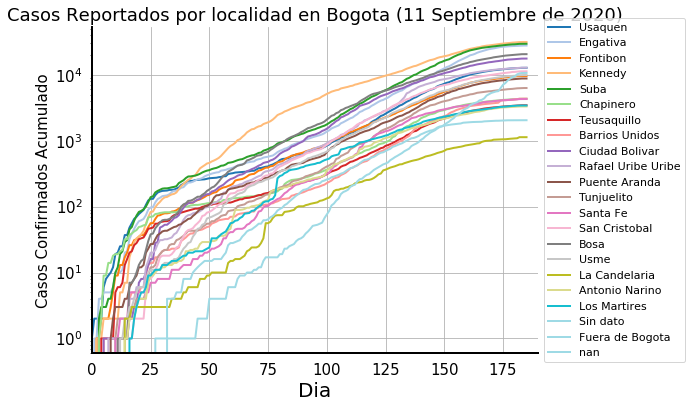

In [16]:
data=pd.read_csv('./covidbogota.csv',sep=";")

data['reporte']=pd.to_datetime(data.reporte, format='%d/%m/%Y')

data=data.sort_values(by='reporte')
Zonas=data.Localidad.unique()
Dias=data.reporte.unique()
fig, ax = plt.subplots(1,1, figsize=(8,6)) 
palette = plt.get_cmap('tab20')
num=0
Zonas#=Zonas[0:18]
for zn in Zonas:
    
    df=data[data.Localidad==zn]
    d=0#dia cero
    cc=0
    casesarr=np.array([])#casos nuevos
    cumarr=np.array([])#casos acumulados
    dayarr=np.array([])#dias
    for day in Dias:    
        df2=df[df.reporte==day]
        cc+=len(df2)
        casesarr=np.concatenate((casesarr,[len(df2)]),axis=0)
        dayarr=np.concatenate((dayarr,[d]),axis=0)
        cumarr=np.concatenate((cumarr,[cc]),axis=0)
        d+=1
        #print(len(df2))
    ax.plot(dayarr,cumarr,label=zn,lw=2,color=palette(num))
    num+=1
    #if cumarr[-1]>180:
        #ax.text(dayarr[-1],cumarr[-1],zn,fontsize=11)
ax.legend(bbox_to_anchor=(1, 0.5),fontsize=11,loc='center left')

#Casos para bogota
df=data
d=0
cc=0
casesarr=np.array([])
cumarr=np.array([])
dayarr=np.array([])
for day in Dias:    
    df2=df[df.reporte==day]
    cc+=len(df2)
    casesarr=np.concatenate((casesarr,[len(df2)]),axis=0)
    dayarr=np.concatenate((dayarr,[d]),axis=0)
    cumarr=np.concatenate((cumarr,[cc]),axis=0)
    d+=1
#ax.plot(dayarr,cumarr,label=zn,lw=3,color='k')
    
    

ax.set_xlim([0,190])
ax.grid()
plt.xlabel("Dia",size=20)
#plt.grid()
#plt.legend(loc=4,fontsize=15)
plt.yscale('log')
plt.ylabel("Casos Confirmados Acumulado",size=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
ax.set_title('Casos Reportados por localidad en Bogota (11 Septiembre de 2020)',fontsize=18)


In [17]:
Zonas=Zonas=['Usaquen','Chapinero','Santa Fe','San Cristobal','Usme','Tunjuelito','Bosa','Kennedy','Fontibon','Engativa','Suba','Barrios Unidos',
       'Teusaquillo','Los Martires','Antonio Narino','Puente Aranda','La Candelaria','Rafael Uribe Uribe','Ciudad Bolivar']
Pop=[501999,139701,110048,404697,457302,199430,673077,1088443,394648,887080,1218513,243465,153025,99119,109176,258287,24088,
     374246,707569,707569]


(0.01, 5)

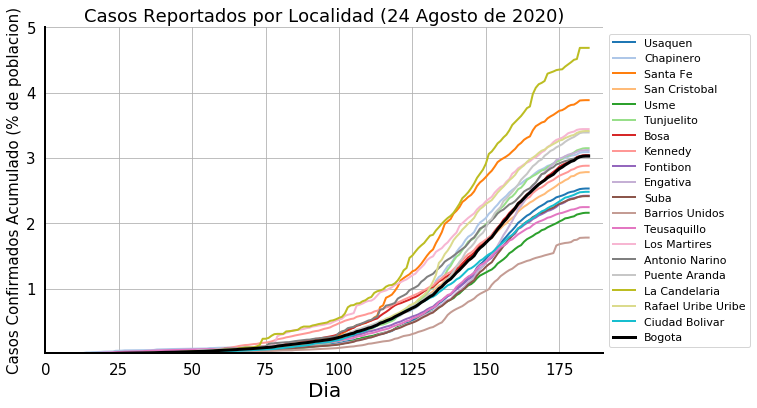

In [40]:
data['reporte']=pd.to_datetime(data.reporte, format='%d/%m/%Y')
data=data.sort_values(by='reporte')
Dias=data.reporte.unique()
fig, ax = plt.subplots(1,1, figsize=(10,6)) 
palette = plt.get_cmap('tab20')
num=0
for zn in Zonas:    
    df=data[data.Localidad==zn]
    d=0
    cc=0
    casesarr=np.array([])
    cumarr=np.array([])
    dayarr=np.array([])
    for day in Dias:    
        df2=df[df.reporte==day]
        cc+=len(df2)
        casesarr=np.concatenate((casesarr,[len(df2)]),axis=0)
        dayarr=np.concatenate((dayarr,[d]),axis=0)
        cumarr=np.concatenate((cumarr,[100*cc/Pop[num]]),axis=0)
        d+=1
    ax.plot(dayarr,cumarr,label=zn,lw=2,color=palette(num))
    num+=1
    #if cumarr[-1]>0.3:
    #    ax.text(dayarr[-1],cumarr[-1],zn,fontsize=11)

df=data
d=0
cc=0
casesarr=np.array([])
cumarr=np.array([])
dayarr=np.array([])
for day in Dias:    
    df2=df[df.reporte==day]
    cc+=len(df2)
    casesarr=np.concatenate((casesarr,[len(df2)]),axis=0)
    dayarr=np.concatenate((dayarr,[d]),axis=0)
    cumarr=np.concatenate((cumarr,[100*cc/7743955]),axis=0)
    d+=1
ax.plot(dayarr,cumarr,lw=3,color='k',label='Bogota')
ax.legend(bbox_to_anchor=(1, 0.5),fontsize=11,loc='center left')

ax.set_xlim([0,190])
ax.grid()
plt.xlabel("Dia",size=20)
plt.ylabel("Casos Confirmados Acumulado (% de poblacion)",size=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
ax.set_title('Casos Reportados por Localidad (24 Agosto de 2020)',fontsize=18)
ax.set_ylim(0.01,5)
#plt.savefig('./Casnormvst.eps',bbox_inches='tight',dpi=600)
#plt.savefig('./Casnormvst.png',bbox_inches='tight',dpi=600)

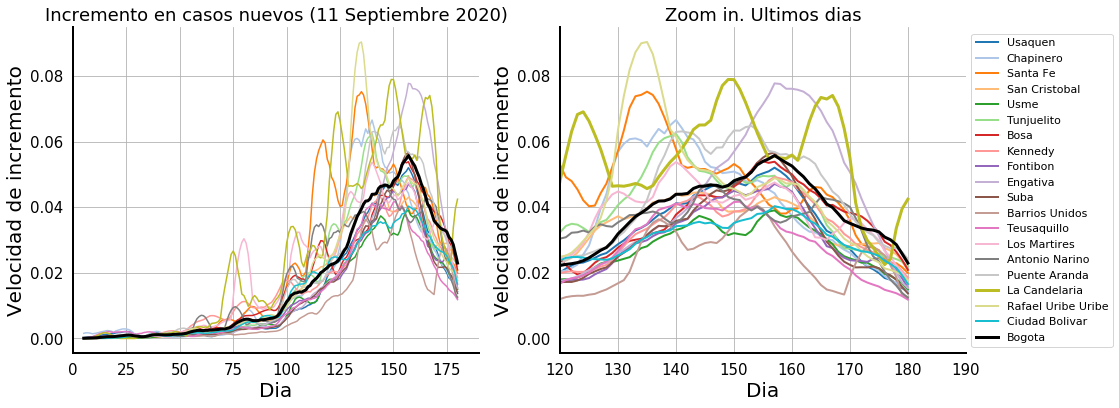

In [25]:
data['reporte']=pd.to_datetime(data.reporte, format='%d/%m/%Y')
data=data.sort_values(by='reporte')
Zonas=['Usaquen','Chapinero','Santa Fe','San Cristobal','Usme','Tunjuelito','Bosa','Kennedy','Fontibon','Engativa','Suba','Barrios Unidos',
       'Teusaquillo','Los Martires','Antonio Narino','Puente Aranda','La Candelaria','Rafael Uribe Uribe','Ciudad Bolivar']
Dias=data.reporte.unique()
fig, ax = plt.subplots(1,2, figsize=(16,6)) 
palette = plt.get_cmap('tab20')
num=0
grrates=np.array([])
texty=np.arange(0,len(Zonas))*0.15
ycord=0
finalr0=[]
for zn in Zonas:    
    df=data[data.Localidad==zn]
    d=0
    cc=0
    casesarr=np.array([])
    cumarr=np.array([])
    dayarr=np.array([])
    for day in Dias:    
        df2=df[df.reporte==day]
        cc+=len(df2)
        casesarr=np.concatenate((casesarr,[len(df2)]),axis=0)
        dayarr=np.concatenate((dayarr,[d]),axis=0)
        cumarr=np.concatenate((cumarr,[100*cc]),axis=0)
        d+=1
    #ax.plot(dayarr,cumarr,label=zn,lw=2,color=palette(num))
    
    x=dayarr
    j=cumarr
    
    y=[]
    for kk in j:
        if kk>0:
            y.append(kk)
        else:
            y.append(0)
    
    r=5
    s0=r
    fit=[]
    timefit=[]
    model = LinearRegression()
    odfit=[]
    while s0<len(y)-r:
        tempy=y[s0-r:s0+r]
        tempx=x[s0-r:s0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        fit.append(model.coef_/Pop[num])
        odfit.append(model.intercept_+model.coef_*x[s0])
        timefit.append(x[s0])
        s0+=1
    ax[0].plot(timefit,np.array(fit),linewidth=1.5,label=zn,color=palette(num))
    
    #print(zn)
    grrates=np.concatenate((grrates,[np.mean(fit[-4:-1])]),axis=0)
    #print(np.mean(fit[-4:-1])/(1/15))
    finalr0.append(fit[-1])
    if fit[-1]>0.9/25:
    #    
        ax[1].plot(timefit,np.array(fit),label=zn,color=palette(num),lw=3)
        
    else:
        ax[1].plot(timefit,np.array(fit),label=zn,color=palette(num),lw=2)
    num+=1

df=data
d=0
cc=0
casesarr=np.array([])
cumarr=np.array([])
dayarr=np.array([])
for day in Dias:    
    df2=df[df.reporte==day]
    cc+=len(df2)
    casesarr=np.concatenate((casesarr,[len(df2)]),axis=0)
    dayarr=np.concatenate((dayarr,[d]),axis=0)
    cumarr=np.concatenate((cumarr,[100*cc]),axis=0)
    d+=1
    
x=dayarr
j=cumarr
    
y=[]
for kk in j:
    if kk>0:
        y.append(kk)
    else:
        y.append(0)
    
r=5
s0=r
fit=[]
timefit=[]
model = LinearRegression()
odfit=[]
while s0<len(y)-r:
    tempy=y[s0-r:s0+r]
    tempx=x[s0-r:s0+r].reshape((-1, 1))
    model.fit(tempx, tempy)
    fit.append(model.coef_/7743955)
    odfit.append(model.intercept_+model.coef_*x[s0])
    timefit.append(x[s0])
    s0+=1
ax[0].plot(timefit,np.array(fit),linewidth=3,label='Bogota',color='k')
ax[1].plot(timefit,np.array(fit),linewidth=3,label='Bogota',color='k')    



x=np.arange(0,160,1)
ax[0].set_xlim([0,190])


ax[1].set_xlim([120,190])



#plt.grid()
#plt.legend(loc=4,fontsize=15)
#plt.yscale('log')
for l in [0,1]:
    ax[l].grid()
    ax[l].set_xlabel("Dia",size=20)
    ax[l].set_ylabel("Velocidad de incremento",size=20)
    ax[l].tick_params(axis='x', labelsize=15)
    ax[l].tick_params(axis='y', labelsize=15)
    for axis in ['bottom','left']:
        ax[l].spines[axis].set_linewidth(2)
        ax[l].tick_params(axis='both', width=2,length=6)
    for axis in ['top','right']:
        ax[l].spines[axis].set_linewidth(0)
        ax[l].tick_params(axis='both', width=0,length=6)
ax[0].set_title('Incremento en casos nuevos (11 Septiembre 2020)',fontsize=18)
ax[1].set_title('Zoom in. Ultimos dias',fontsize=18)
#ax[1].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1, 0.5),fontsize=11,loc='center left')
#plt.savefig('./grvst.eps',bbox_inches='tight',dpi=600)
#plt.savefig('./grvst.png',bbox_inches='tight',dpi=600)

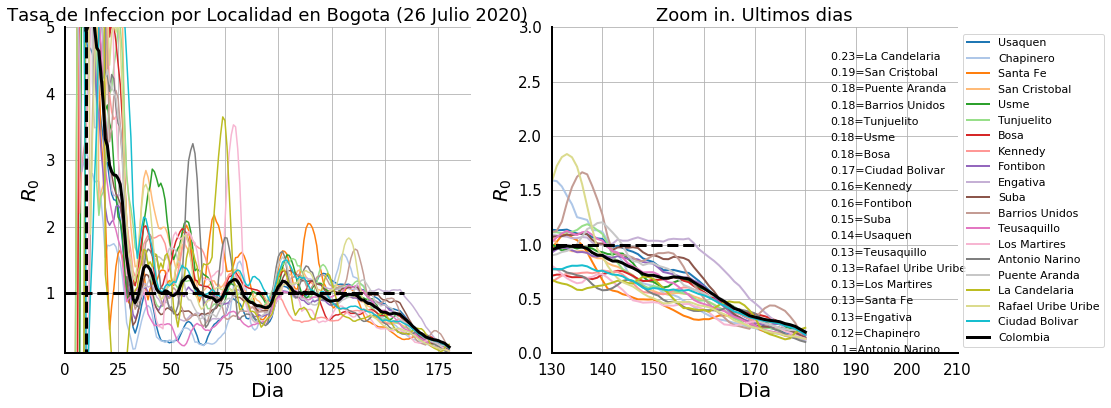

In [30]:
#data=pd.read_csv('./covidcolombia.csv')
#data=data[data.FIS!="Asintomatico"]
data['reporte']=pd.to_datetime(data.reporte, format='%d/%m/%Y')
data=data.sort_values(by='reporte')
Zonas=['Usaquen','Chapinero','Santa Fe','San Cristobal','Usme','Tunjuelito','Bosa','Kennedy','Fontibon','Engativa','Suba','Barrios Unidos',
       'Teusaquillo','Los Martires','Antonio Narino','Puente Aranda','La Candelaria','Rafael Uribe Uribe','Ciudad Bolivar']
Dias=data.reporte.unique()
fig, ax = plt.subplots(1,2, figsize=(16,6)) 
palette = plt.get_cmap('tab20')
num=0
grrates=np.array([])
texty=np.arange(0,len(Zonas))*0.15
ycord=0
finalr0=[]
for zn in Zonas:    
    df=data[data.Localidad==zn]
    d=0
    cc=0
    casesarr=np.array([])
    cumarr=np.array([])
    dayarr=np.array([])
    for day in Dias:    
        df2=df[df.reporte==day]
        cc+=len(df2)
        casesarr=np.concatenate((casesarr,[len(df2)]),axis=0)
        dayarr=np.concatenate((dayarr,[d]),axis=0)
        cumarr=np.concatenate((cumarr,[100*cc]),axis=0)
        d+=1
    #ax.plot(dayarr,cumarr,label=zn,lw=2,color=palette(num))
    
    x=dayarr
    j=cumarr
    
    y=[]
    for kk in j:
        if kk>0:
            y.append(np.log(kk))
        else:
            y.append(0)
    
    r=5
    s0=r
    fit=[]
    timefit=[]
    model = LinearRegression()
    odfit=[]
    while s0<len(y)-r:
        tempy=y[s0-r:s0+r]
        tempx=x[s0-r:s0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        fit.append(model.coef_)
        odfit.append(model.intercept_+model.coef_*x[s0])
        timefit.append(x[s0])
        s0+=1
    ax[0].plot(timefit,np.array(fit)*25,linewidth=1.5,label=zn,color=palette(num))
    
    #print(zn)
    grrates=np.concatenate((grrates,[np.mean(fit[-4:-1])]),axis=0)
    #print(np.mean(fit[-4:-1])/(1/15))
    finalr0.append(fit[-1])
    if fit[-1]>0.9/25:
    #    
        ax[1].plot(timefit,np.array(fit)*25,label=zn,color=palette(num),lw=3)
        
    else:
        ax[1].plot(timefit,np.array(fit)*25,label=zn,color=palette(num),lw=2)
    num+=1
    
dat=pd.DataFrame(finalr0,columns=["r0"])
dat["dep"]=Zonas
dat=dat.sort_values(by='r0')
dat=dat.reset_index(drop=True)
ycord=0
for i in dat.r0:
    ax[1].text(185,texty[ycord],str(np.round(dat.loc[ycord].r0*25,2))+"="+str(dat.loc[ycord].dep),fontsize=11)
    ycord+=1

df=data
d=0
cc=0
casesarr=np.array([])
cumarr=np.array([])
dayarr=np.array([])
for day in Dias:    
    df2=df[df.reporte==day]
    cc+=len(df2)
    casesarr=np.concatenate((casesarr,[len(df2)]),axis=0)
    dayarr=np.concatenate((dayarr,[d]),axis=0)
    cumarr=np.concatenate((cumarr,[100*cc]),axis=0)
    d+=1
    #ax.plot(dayarr,cumarr,label=zn,lw=2,color=palette(num))
    
x=dayarr
j=cumarr
    
y=[]
for kk in j:
    if kk>0:
        y.append(np.log(kk))
    else:
        y.append(0)
    
r=5
s0=r
fit=[]
timefit=[]
model = LinearRegression()
odfit=[]
while s0<len(y)-r:
    tempy=y[s0-r:s0+r]
    tempx=x[s0-r:s0+r].reshape((-1, 1))
    model.fit(tempx, tempy)
    fit.append(model.coef_)
    odfit.append(model.intercept_+model.coef_*x[s0])
    timefit.append(x[s0])
    s0+=1
ax[0].plot(timefit,np.array(fit)*25,linewidth=3,label='Colombia',color='k')
ax[1].plot(timefit,np.array(fit)*25,linewidth=3,label='Colombia',color='k')    



x=np.arange(0,160,1)
ax[1].plot(x,np.ones(len(x)),lw=3,c='k',ls='--')
ax[0].plot(x,np.ones(len(x)),lw=3,c='k',ls='--')
ax[0].plot([10,10],[0,5],lw=3,c='k',ls='--')
ax[0].set_xlim([0,190])
ax[0].set_ylim([0.1,5])

ax[1].set_xlim([130,210])
ax[1].set_ylim([0,3])



#plt.grid()
#plt.legend(loc=4,fontsize=15)
#plt.yscale('log')
for l in [0,1]:
    ax[l].grid()
    ax[l].set_xlabel("Dia",size=20)
    ax[l].set_ylabel("$R_0$",size=20)
    ax[l].tick_params(axis='x', labelsize=15)
    ax[l].tick_params(axis='y', labelsize=15)
    for axis in ['bottom','left']:
        ax[l].spines[axis].set_linewidth(2)
        ax[l].tick_params(axis='both', width=2,length=6)
    for axis in ['top','right']:
        ax[l].spines[axis].set_linewidth(0)
        ax[l].tick_params(axis='both', width=0,length=6)
ax[0].set_title('Tasa de Infeccion por Localidad en Bogota (26 Julio 2020)',fontsize=18)
ax[1].set_title('Zoom in. Ultimos dias',fontsize=18)
#ax[1].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1, 0.5),fontsize=11,loc='center left')
#plt.savefig('./grvst.eps',bbox_inches='tight',dpi=600)
#plt.savefig('./grvst.png',bbox_inches='tight',dpi=600)



Text(0,0.5,'Incremento Diario (Suavizado)')

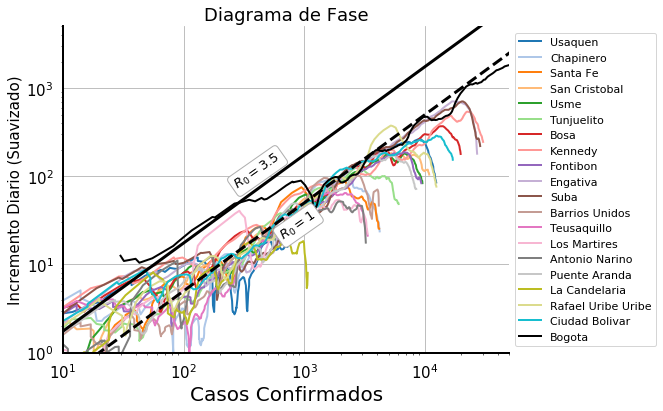

In [39]:
data=pd.read_csv('./covidbogota.csv',sep=";")
data['reporte']=pd.to_datetime(data.reporte, format='%d/%m/%Y')
data=data.sort_values(by='reporte')
#v=pd.DataFrame(data.Localidad.unique()).sort_values(by=0)
#v.columns=['name']
#vv=v.name.tolist()
#Zonas=vv
Dias=data.reporte.unique()
fig, ax = plt.subplots(1,1, figsize=(8,6)) 
palette = plt.get_cmap('tab20')
num=0
for zn in Zonas:
    
    df=data[data.Localidad==zn]
    d=0
    cc=0
    casesarr=np.array([])
    cumarr=np.array([])
    dayarr=np.array([])
    for ll in range(len(Dias)-2):
        day=Dias[ll]
        df2=df[df.reporte==day]
        cc+=len(df2)
        casesarr=np.concatenate((casesarr,[len(df2)]),axis=0)
        dayarr=np.concatenate((dayarr,[d]),axis=0)
        cumarr=np.concatenate((cumarr,[cc]),axis=0)
        d+=1
    r=5
    x=dayarr
    j=cumarr
    
    y=[]
    for kk in j:
        if kk>0:
            y.append(np.log(kk))
        else:
            y.append(0)
    s0=r
    ydot=[]
    yy=[]
    timefit=[]
    model = LinearRegression()
    odfit=[]
    while s0<len(y)-r:
        tempy=y[s0-r:s0+r]
        tempx=x[s0-r:s0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        ydot.append(j[s0]*model.coef_)
        yy.append(j[s0])
        odfit.append(model.intercept_+model.coef_*x[s0])
        timefit.append(x[s0])
        s0+=1
    plt.plot(yy,ydot,linewidth=2,color=palette(num),label=zn)
    num+=1
df=data
d=0
cc=0
casesarr=np.array([])
cumarr=np.array([])
dayarr=np.array([])
for day in Dias:    
    df2=df[df.reporte==day]
    cc+=len(df2)
    casesarr=np.concatenate((casesarr,[len(df2)]),axis=0)
    dayarr=np.concatenate((dayarr,[d]),axis=0)
    cumarr=np.concatenate((cumarr,[cc]),axis=0)
    d+=1
r=5
x=dayarr
j=cumarr
    
y=[]
for kk in j:
    if kk>0:
        y.append(np.log(kk))
    else:
        y.append(0)
s0=r
ydot=[]
yy=[]
timefit=[]
model = LinearRegression()
odfit=[]
while s0<len(y)-r:
    tempy=y[s0-r:s0+r]
    tempx=x[s0-r:s0+r].reshape((-1, 1))
    model.fit(tempx, tempy)
    ydot.append(j[s0]*model.coef_)
    yy.append(j[s0])
    odfit.append(model.intercept_+model.coef_*x[s0])
    timefit.append(x[s0])
    s0+=1
plt.plot(yy,ydot,linewidth=2,color='k',label='Bogota')
    #ax[0].plot(dayarr,cumarr,label=zn,lw=2,color=palette(num))
    #if cumarr[-1]>180:
        #ax.text(dayarr[-1],cumarr[-1],zn,fontsize=11)
plt.yscale('log')
plt.xscale('log')
plt.ylim([1,5000])
plt.xlim([10,50000])
x=10**np.arange(0,6,0.01)
y=(1/20)*x
plt.plot(x,y,c='k',lw=3,ls="--")

x=10**np.arange(0,6,0.01)
y=3.5*(1/20)*x
plt.plot(x,y,c='k',lw=3)
ax.legend(bbox_to_anchor=(1, 0.5),fontsize=11,loc='center left')
plt.grid()
props2 = dict(boxstyle='round',linewidth=1,facecolor='w',edgecolor='#AEAEAE')
plt.text(250,150,"$R_0=3.5$",fontsize=13,bbox=props2,rotation='35')
plt.text(600,33,"$R_0=1$",fontsize=13,bbox=props2,rotation='35')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
ax.set_title('Diagrama de Fase',fontsize=18)
plt.xlabel("Casos Confirmados",size=20)
plt.ylabel("Incremento Diario (Suavizado)",size=15)
#plt.savefig('./phase.eps',bbox_inches='tight',dpi=600)
#plt.savefig('./phase.png',bbox_inches='tight',dpi=600)